In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import requests
import warnings
warnings.filterwarnings("ignore")
import prepare
import acquire

In [2]:
df = acquire.get_all_sales_data()
df.head(2)

,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_id,item_brand,item_name,item_price,item_upc12,item_upc14
sale_amount,,,,,,,,,,,,,
13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


### 1.  Convert date column to datetime format.

In [3]:
df.sale_date = df.sale_date.apply(lambda x: x[:-13])

In [4]:
df.sale_date = pd.to_datetime(df.sale_date)

In [5]:
df.head(2)

,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_id,item_brand,item_name,item_price,item_upc12,item_upc14
sale_amount,,,,,,,,,,,,,
13.0,2013-01-01,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
11.0,2013-01-02,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [6]:
df.columns

Index(['sale_date', 'sale_id', 'store_id', 'store_address', 'store_city',
       'store_state', 'store_zipcode', 'item_id', 'item_brand', 'item_name',
       'item_price', 'item_upc12', 'item_upc14'],
      dtype='object')

### 2. Plot the distribution of sale_amount and item_price.

In [7]:
df = df.reset_index()
df.head(2)

,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_id,item_brand,item_name,item_price,item_upc12,item_upc14
0,13.0,2013-01-01,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,11.0,2013-01-02,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


array([[<AxesSubplot:title={'center':'sale_amount'}>,
        <AxesSubplot:title={'center':'item_price'}>]], dtype=object)

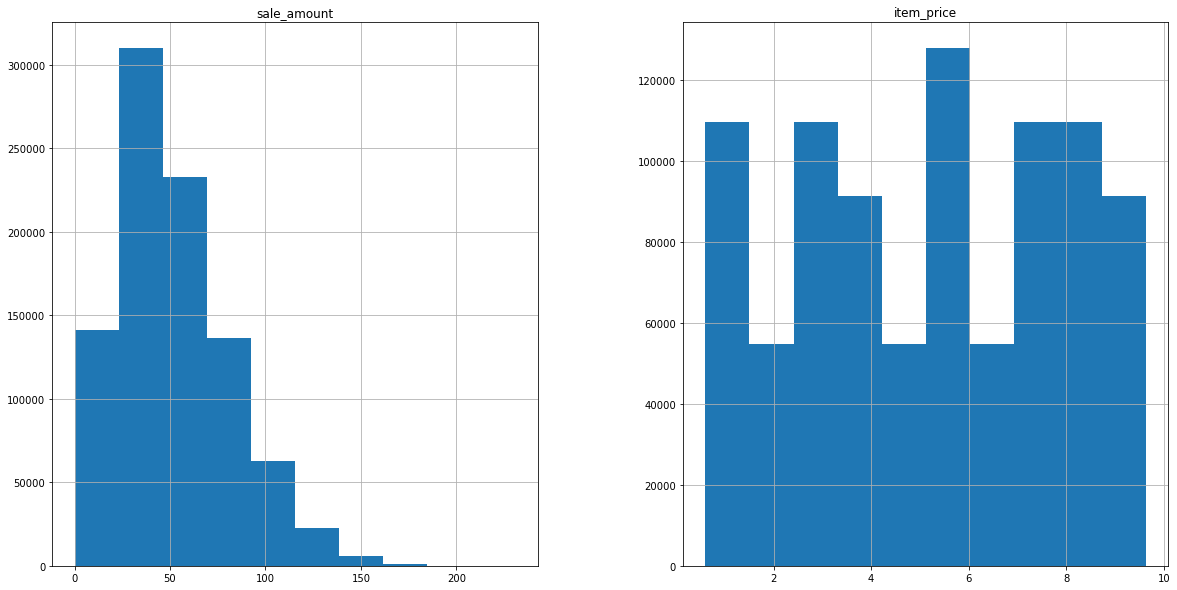

In [8]:
df[['sale_amount', 'item_price']].hist(figsize=(20,10))

In [9]:
# plt.figure(figsize=(10,5))
# df.sale_amount.hist()
# plt.title('Sale Amount')
# #df2.item_price.hist(label='item_price')
# plt.show()

In [10]:
# plt.figure(figsize=(10,5))
# #df2.sale_amount.hist(label='sale_amount')
# df.item_price.hist()
# plt.title('Item Price')
# plt.show

### 3. Set the index to be the datetime variable.

In [11]:
df = df.set_index('sale_date').sort_index()
df.head(2)

,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_id,item_brand,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,12,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211


### 4. Add a 'month' and 'day of week' column to your dataframe.

In [12]:
df['month'] = df.index.month_name()
df['day_of_week'] = df.index.day_name()

In [13]:
df.head(2)

,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_id,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday
2013-01-01,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,12,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday


### 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_amount    913000 non-null  float64
 1   sale_id        913000 non-null  int64  
 2   store_id       913000 non-null  int64  
 3   store_address  913000 non-null  object 
 4   store_city     913000 non-null  object 
 5   store_state    913000 non-null  object 
 6   store_zipcode  913000 non-null  int64  
 7   item_id        913000 non-null  int64  
 8   item_brand     913000 non-null  object 
 9   item_name      913000 non-null  object 
 10  item_price     913000 non-null  float64
 11  item_upc12     913000 non-null  int64  
 12  item_upc14     913000 non-null  int64  
 13  month          913000 non-null  object 
 14  day_of_week    913000 non-null  object 
dtypes: float64(2), int64(6), object(7)
memory usage: 111.5+ MB


In [15]:
df['sales_total'] = df['sale_amount'] * df['item_price']

In [16]:
df[['sales_total', 'sale_amount', 'item_price']].head(2)

,sales_total,sale_amount,item_price
sale_date,,,
2013-01-01,10.92,13.0,0.84
2013-01-01,218.40,26.0,8.40


### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [17]:
df = prepare.prep_all_sales(df)
df.head(2)

AttributeError: 'DataFrame' object has no attribute 'sale_date'

## Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [18]:
germany_df = acquire.get_germany_power()
germany_df.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


### 1. Convert date column to datetime format.

In [19]:
germany_df['Date'] = pd.to_datetime(germany_df.Date)
germany_df.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [20]:
germany_df.isnull().sum()

Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

### 2. Plot the distribution of each of your variables.

In [21]:
germany_df.columns

Index(['Date', 'Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

array([[<AxesSubplot:title={'center':'Consumption'}>,
        <AxesSubplot:title={'center':'Wind'}>],
       [<AxesSubplot:title={'center':'Solar'}>,
        <AxesSubplot:title={'center':'Wind+Solar'}>]], dtype=object)

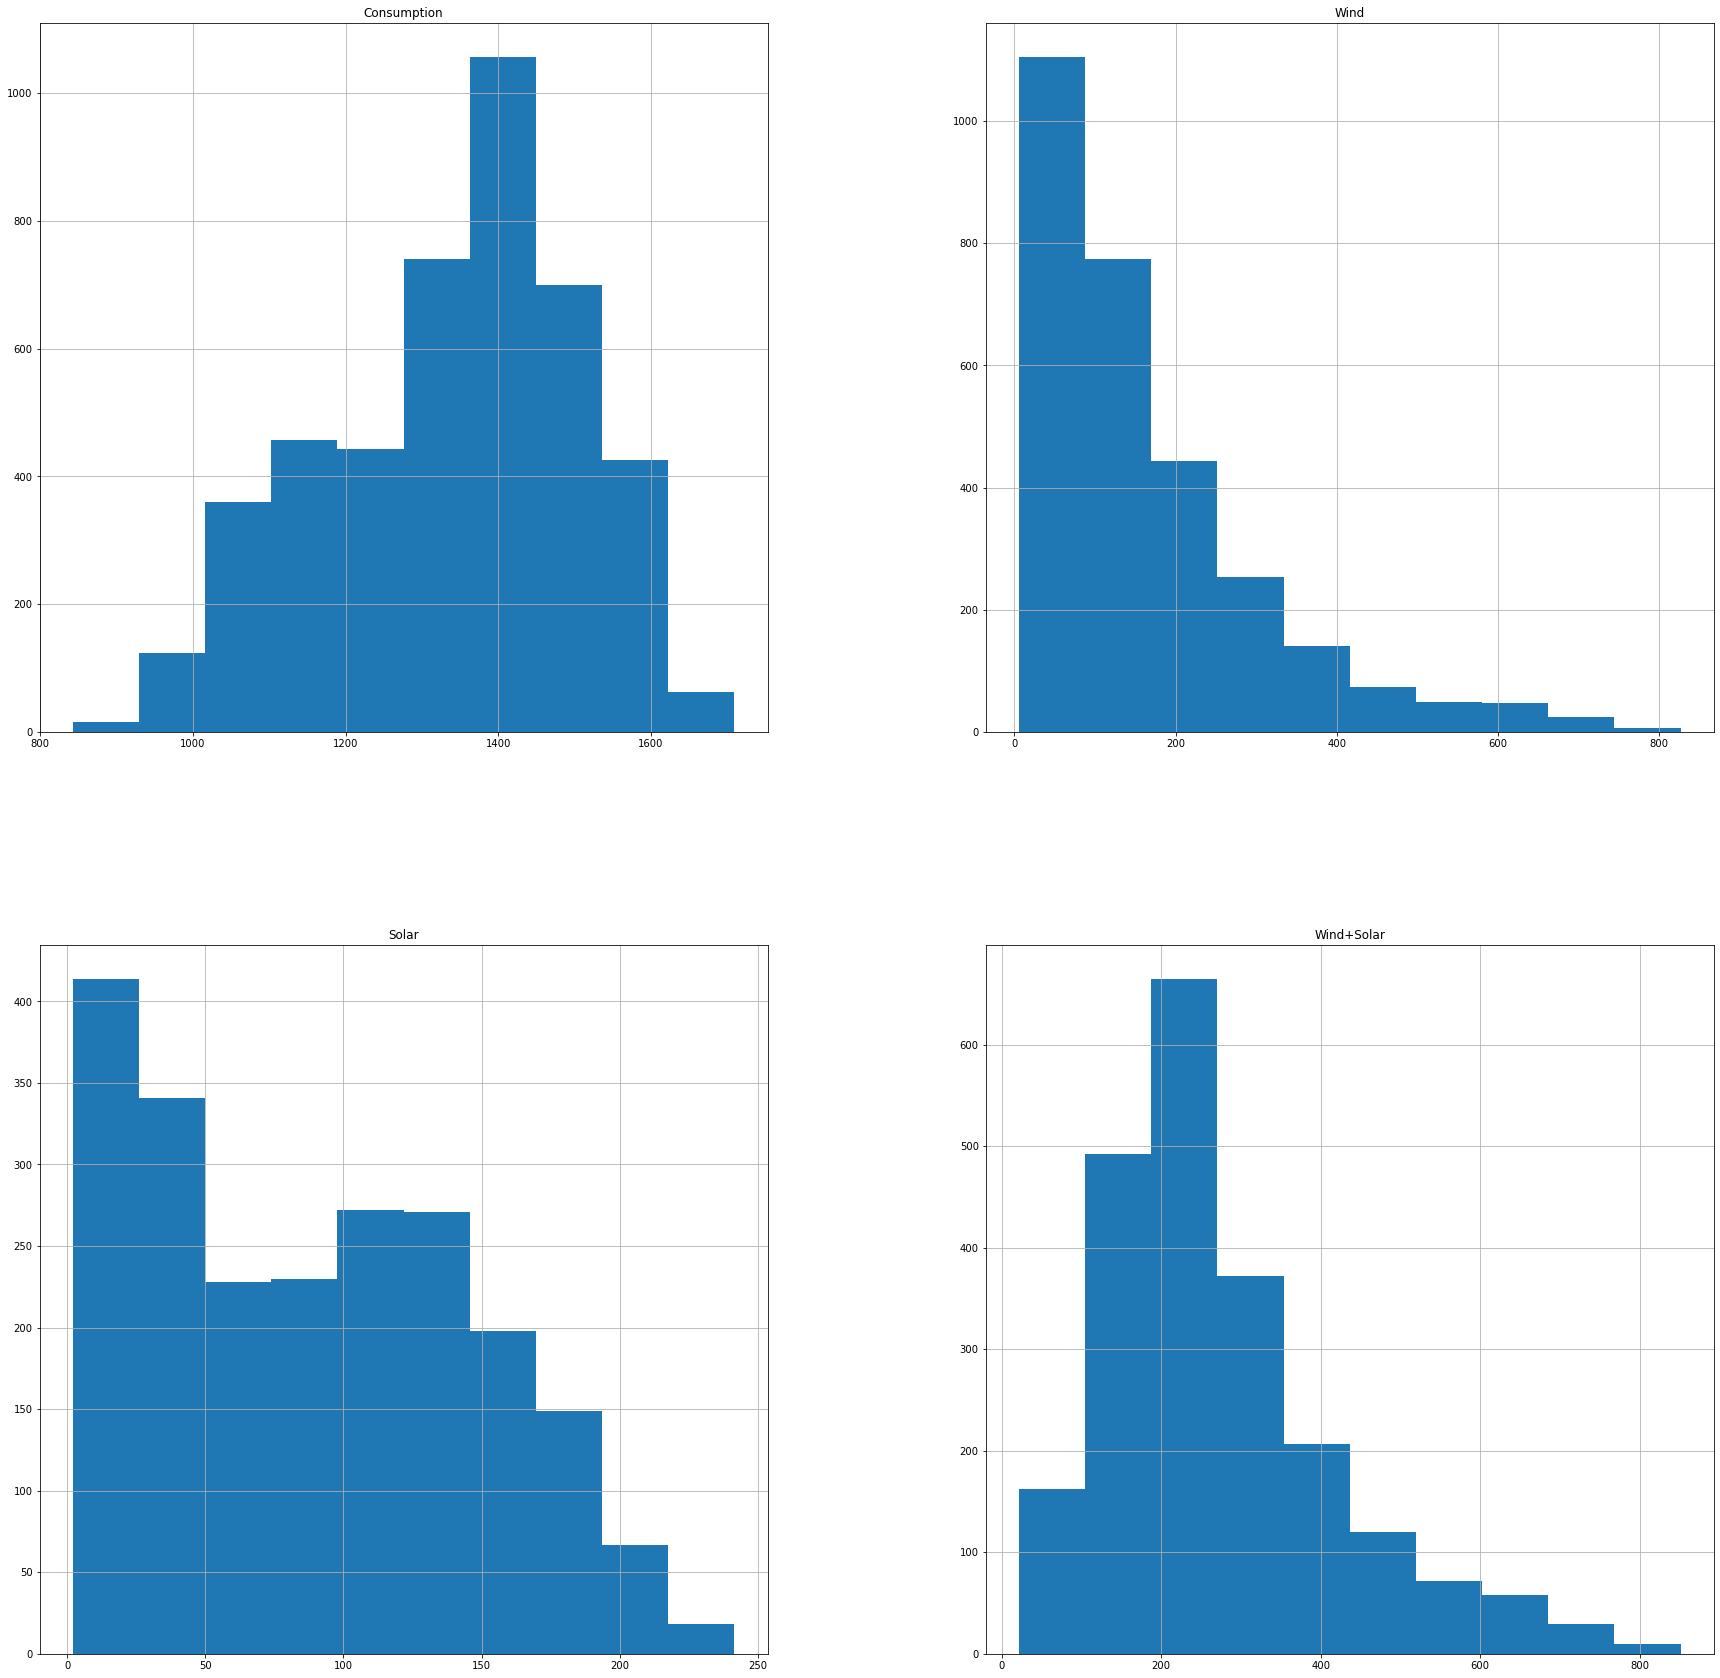

In [22]:
germany_df.hist(figsize=(30,30))

In [23]:
# plt.figure(figsize=(10,5))
# germany_df.Consumption.hist()
# plt.title('Distribution of Consumption')
# plt.xlabel('Consumption')
# plt.ylabel('Count')
# plt.show()

In [24]:
# plt.figure(figsize=(10,5))
# germany_df.Wind.hist()
# plt.title('Dist of Wind Production')
# plt.xlabel('Wind')
# plt.ylabel('Count')
# plt.show()

In [25]:
# plt.figure(figsize=(10,5))
# germany_df.Solar.hist()
# plt.title('Dist of Solar Production')
# plt.xlabel('Solar')
# plt.ylabel('Count')
# plt.show()


In [26]:
# plt.figure(figsize=(10,5))
# germany_df['Wind+Solar'].hist()
# plt.title('Dist of Wind+Solar Production')
# plt.xlabel('Wind+Solar')
# plt.ylabel('Count')
# plt.show()

### 3. Set the index to be the datetime variable.

In [27]:
germany_df = germany_df.set_index('Date').sort_index()

In [28]:
germany_df.head(2)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN


### 4. Add a month and a year column to your dataframe.

In [29]:
germany_df['month'] = germany_df.index.month_name()
germany_df.head(3)

,Consumption,Wind,Solar,Wind+Solar,month
Date,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January
2006-01-02,1380.521,NaN,NaN,NaN,January
2006-01-03,1442.533,NaN,NaN,NaN,January


In [30]:
germany_df['year'] = germany_df.index.year
germany_df.head(3)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006
2006-01-03,1442.533,NaN,NaN,NaN,January,2006


### 5. Fill any missing values.

In [31]:
germany_df = germany_df.fillna(0)
germany_df.head(3)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006


### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [35]:
germany_df = prepare.prep_germany()
germany_df.head(2)

TypeError: prep_germany() missing 1 required positional argument: 'df'